<a href="https://colab.research.google.com/github/themwsama/Spotify-Data-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="+20">**Analyzing Spotify Music**</font>



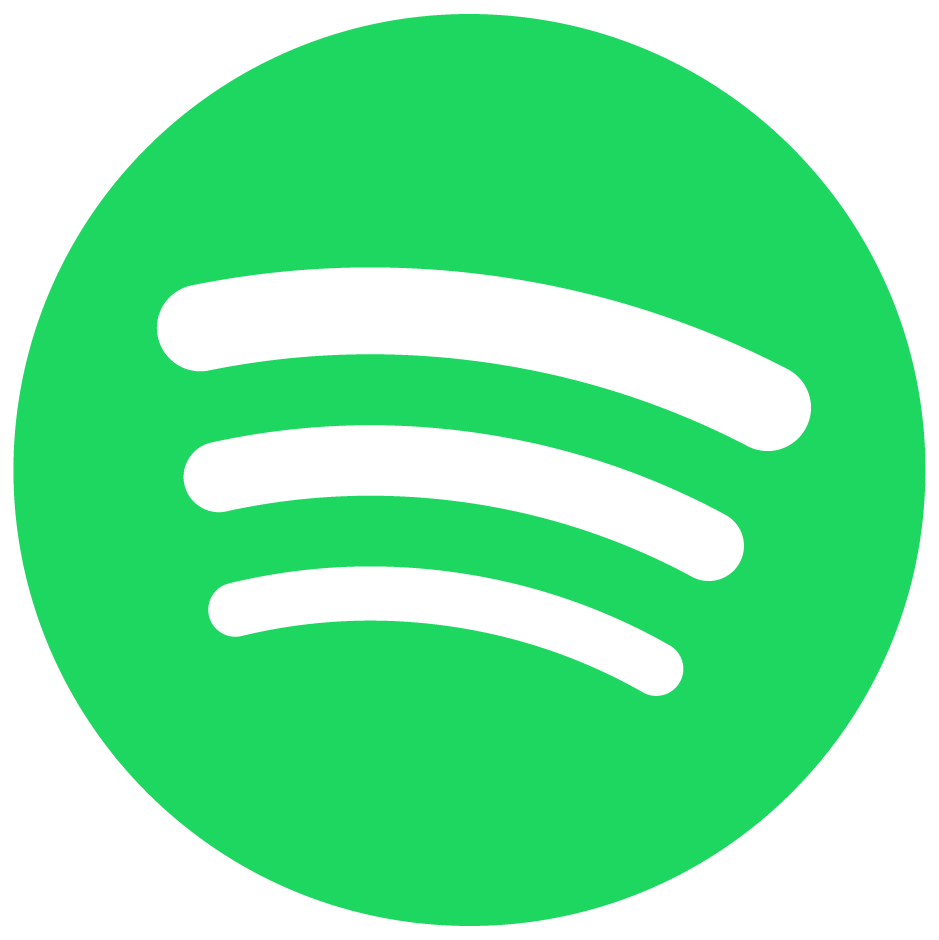

#<font size="+3">**Downloading Packages**</font>

In [1]:
!pip install opendatasets --quiet
!pip install pandas --quiet

#<font size="+3">**Retrieving Dataset**</font>

In [2]:
import opendatasets as od
import pandas

dataSetLink = 'https://www.kaggle.com/datasets/nimishasen27/spotify-dataset'
user = 'mwsama'
key = '787659a5c3b2037fd1d8030ea3993a16'
od.download(dataSetLink)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mwsama
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nimishasen27/spotify-dataset


100%|██████████| 82.2M/82.2M [00:00<00:00, 888MB/s]

In [3]:
data_artists = './spotify-dataset/artists.csv'
data_tracks = './spotify-dataset/tracks.csv'


#<font size="+3">**Data Preparation and Cleaning**</font>

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_artists = pd.read_csv(data_artists)
df_tracks = pd.read_csv(data_tracks)

In [6]:
df_artists.info()
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104346 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672

In [7]:
def convert_date_to_year(x):
    return x.split('-')[0]

df_tracks['release_date'] = df_tracks['release_date'].apply(convert_date_to_year)

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df_tracks = df_tracks.select_dtypes(include=numerics)
len(numeric_df_tracks.columns)


15

In [9]:
#Plots the percentage of missing values in the data
missingPercentages = numeric_df_tracks.isna().sum().sort_values(ascending=False) / len(numeric_df_tracks)

# Check if there are any missing values
if missingPercentages[missingPercentages != 0].empty:
    print("There are no missing values in the numeric columns of df_tracks.")
else:
    # Plots only categories with missing data
    zero_rows_count = (numeric_df_tracks == 0).all(axis=1).sum()
    if zero_rows_count != len(numeric_df_tracks):
        missingPercentages[missingPercentages != 0].plot(kind='barh')

There are no missing values in the numeric columns of df_tracks.


<font size="+3">**Exploratory Analysis and Visualization on Spotify Music**</font>

#Artist CSV Data:
1. Followers: Number of followers the artist has on Spotify.
2. Genres: A list of genres associated with the artist.
3. Name: The artist's name.
4. popularity: A numeric score (0–100) reflecting the artist's overall popularity on Spotify.

#Spotify Track Music CSV Data:
1. id: Unique identifier for each track.
2. name: The name/title of the track.
3. popularity: Track popularity score on Spotify (0–100).
4. duration_ms: Duration of the track in milliseconds.
5. explicit: Boolean indicator of whether the track has explicit content.
6. artists: List of artist names featured in the track.
7. id_artists: Corresponding list of artist IDs for reference and joins.
8. release_date: The track’s release date.
9. danceability, energy: Audio features calculated by Spotify’s algorithm, representing the musical feel of the track.




###1. Has Energy and Danceability for all different music genre remained the same overtime or not?

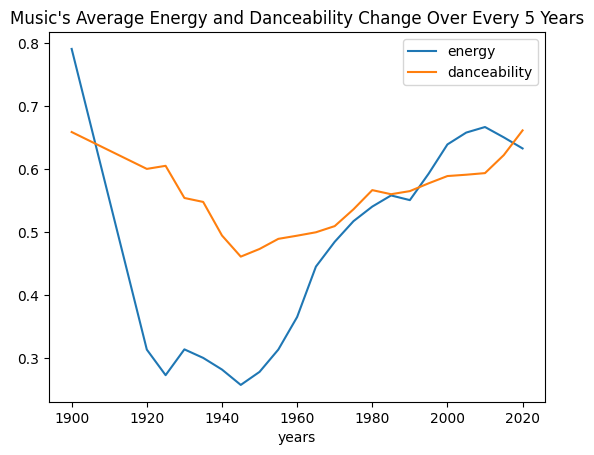

<Figure size 1800x600 with 0 Axes>

In [10]:
graph_df_tracks = df_tracks.copy()
graph_df_tracks['years'] = (graph_df_tracks['release_date'].astype(int) // 5) * 5

mean_df_tracks = graph_df_tracks[['danceability', 'energy', 'years']].groupby('years').mean().reset_index()

mean_df_tracks.plot(x='years', y=['energy', 'danceability'],
        kind='line',
        title="Music's Average Energy and Danceability Change Over Every 5 Years")

sns.set(style="whitegrid")  # Optional: cleaner background
plt.figure(figsize=(18, 6))
plt.tight_layout()
plt.show()

###2. Is there a correlation between the duration of music and its popularity?

The correlation between duration and popularity is: 0.027680666048806486


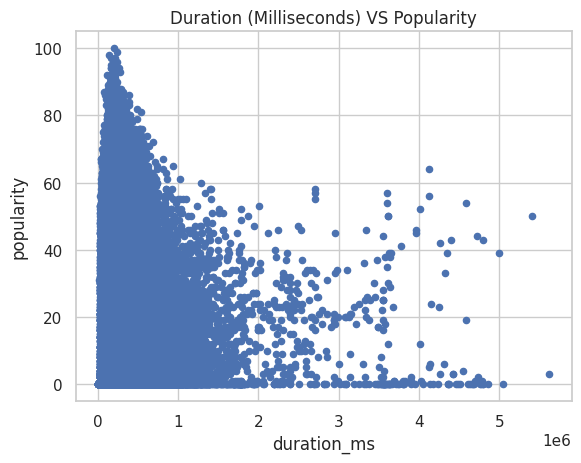

In [11]:
df_tracks.plot(x='duration_ms', y='popularity',
        kind='scatter',
        title="Duration (Milliseconds) VS Popularity")

# Calculate the correlation between 'duration_ms' and 'popularity'
correlation = df_tracks['duration_ms'].corr(df_tracks['popularity'])

print(f"The correlation between duration and popularity is: {correlation}")

###3. Has there been an overall increase in explicit music?

The correlation between years and # of explicit music is: 0.8670689093192383


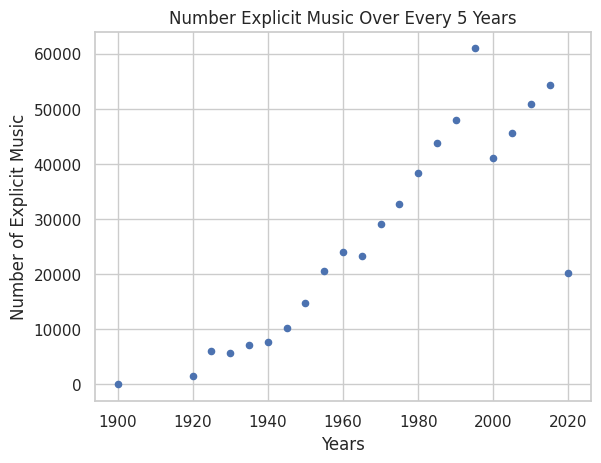

In [12]:
# Count in Explicit Music Over Time
explicit_df_tracks = df_tracks.copy()
explicit_df_tracks['years'] = (explicit_df_tracks['release_date'].astype(int) // 5) * 5
new_explicit_df = explicit_df_tracks.groupby(['years']).count().reset_index()

plot = new_explicit_df.plot(x='years', y='explicit',
        kind='scatter',
        title="Number Explicit Music Over Every 5 Years")
plot.set_ylabel('Number of Explicit Music')
plot.set_xlabel('Years')

# Calculate the correlation between 'years' and '# of explicit music'
correlation = new_explicit_df['years'].corr(new_explicit_df['explicit'])

print(f"The correlation between years and # of explicit music is: {correlation}")

#<font size="+3">**Ask and Answer**</font>

1. Has Energy and Danceability for all different music genre remained the same overtime or not?
2. Is there a correlation between the duration of music and its popularity?
3. Has there been an overall increase in explicit music?



#<font size="+3">**Conclusion**</font>

#Insights
1. Missing data on genre of music artist make
2. Unknown method Spotify uses to measure popularity
3. Unknown standards on what explicit music is
4. Unknown if the rating of the tracks' popularity were recent or not.

#Answered Questions
1. Energy and Danceability seems to decrease from the 1900 to the 1920 and stay low for a while till 1940. It's till from 1940 that both factors increased.
Both factors follow a similar type of growth, suggesting a possible positive correlation between Energy and Danceability. However from 1990 to 2020, there seems to be overshot in energy while there being a small increase in energy.
2. The duration of music and popularity seems to have no correlation with each other its correlation factor is approximately 0.028. However there seems to be a high density of music between 0 and 1000000 milliseconds, suggesting that most music are generally in that range. Despite this, the range of popularity within that time length of the music seems to be from 0 to 100. This suggests that the length of music seems to not matter with popularity.
3. There is a overall strong positive correlation (mainly because correlation factor is 0.867, very high factor)between time and the number of explicit songs. However there seems to be inconsistent data from 2000 and 2020 as the data seems to spread out in the number of explicit music overall. Specifically in 2020, there is a large drop in explicit music from 2019. Since there is no data points in between, it is difficult to tell if this is a flux or a part of a change in trends.




<font size="+3">**Sources**</font>

https://www.kaggle.com/datasets/nimishasen27/spotify-dataset